**IMPORTING THE LIBRARIES REQUIRED**

In [38]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import pandas as pd

In [39]:
# Indian Elephants
ind_elep = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013")
ind_elep_1 = BeautifulSoup(ind_elep.content, 'html.parser')
ind_elep_1_soup=str(ind_elep_1)
ind_elep_1_soup_split=ind_elep_1_soup.split('\r\n')

# African Elephants
afr_elep = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458")
afr_elep_1 = BeautifulSoup(afr_elep.content, 'html.parser')
afr_elep_1_soup=str(afr_elep_1)
afr_elep_1_soup_split=afr_elep_1_soup.split('\r\n')

# Tusker Elephants
tus_elep = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265")
tus_elep_1 = BeautifulSoup(tus_elep.content, 'html.parser')
tus_elep_1_soup=str(tus_elep_1)
tus_elep_1_soup_split=tus_elep_1_soup.split('\r\n')

In [40]:
!mkdir /content/IAT_train/ 
!mkdir /content/IAT_valid/ 
!mkdir /content/IAT_test/ 

img_rows, img_cols = 240, 240 
input_shape = (img_rows, img_cols, 3)
n_train=210
n_valid=70
n_test=70

def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	return image

mkdir: cannot create directory ‘/content/IAT_train/’: File exists
mkdir: cannot create directory ‘/content/IAT_valid/’: File exists
mkdir: cannot create directory ‘/content/IAT_test/’: File exists


**FETCHING THE TRAINING DATA**

In [41]:
for progress in range(n_train):
    if not ind_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(ind_elep_1_soup_split[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IAT_train/IND.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
for progress in range(n_train):
    if not afr_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(afr_elep_1_soup_split[progress])
        if (len(I.shape))==3:
          save_path = '/content/IAT_train/AFR.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None


In [42]:
for progress in range(n_train):
    if progress%20 ==0:
      print(progress)

    if not tus_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(tus_elep_1_soup_split[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IAT_train/TUS.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None

0
20
40
60
80
100
120
140
160
180
200


**FETCHING THE TESTING DATA**

In [43]:
for progress in range(n_test):
    if not ind_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(ind_elep_1_soup_split[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IAT_test/IND.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
for progress in range(n_test):
    if not afr_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(afr_elep_1_soup_split[progress])
        if (len(I.shape))==3:
          save_path = '/content/IAT_test/AFR.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
for progress in range(n_test):
    if not tus_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(tus_elep_1_soup_split[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IAT_test/TUS.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None

**FETCHING THE VALIDATION DATA**


In [44]:
for progress in range(n_valid):
    if not ind_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(ind_elep_1_soup_split[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IAT_valid/IND.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
for progress in range(n_valid):
    if not afr_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(afr_elep_1_soup_split[progress])
        if (len(I.shape))==3:
          save_path = '/content/IAT_valid/AFR.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
for progress in range(n_valid):
    if not tus_elep_1_soup_split[progress] == None:
      try:
        I = url_to_image(tus_elep_1_soup_split[progress])
        if (len(I.shape))==3: 
          save_path = '/content/IAT_valid/TUS.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None

**CATEGORIZING/DIVIDING INTO CLASSES**

In [60]:
import os
original_train = '/content/IAT_train/'
original_valid= '/content/IAT_valid/'
original_test = '/content/IAT_test/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'IND':
      categories.append('0')
    elif category == 'AFR':
      categories.append('1')
    else:
      categories.append('2') 

filenames = os.listdir(original_valid)
categories1 = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'IND':
      categories1.append('0')
    elif category == 'AFR':
      categories1.append('1')
    else:
      categories1.append('2') 

filenames = os.listdir(original_test)
categories2 = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'IND':
      categories2.append('0')
    elif category == 'AFR':
      categories2.append('1')
    else:
      categories2.append('2') 

In [69]:
# Print the categories to check the number of classes
print(categories)

['0', '1', '0', '1', '2', '2', '1', '1', '2', '1', '1', '2', '0', '1', '0', '2', '2', '1', '1', '1', '2', '0', '2', '1', '2', '0', '1', '2', '1', '2', '1', '0', '0', '1', '2', '2', '1', '2', '1', '0', '1', '2', '1', '2', '2', '2', '1', '2', '1', '2', '2', '1', '1', '2', '1', '2', '0', '0', '2', '2', '1', '2', '2', '0', '1', '0', '0', '1', '1', '1', '2', '2', '1', '1', '2', '0', '2', '0', '1', '1', '0', '1', '2', '1', '1', '1', '2', '2', '2', '1', '2', '0', '1', '1', '1', '1', '0', '0', '2', '1', '0', '2', '1', '1', '2', '0', '1', '1', '2', '0', '1', '2', '2', '0', '2', '1', '0', '0', '2', '0', '1', '0', '2', '0', '0', '0', '0', '0', '0', '1', '0', '1', '2', '0', '1', '1', '2', '1', '2', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '2', '2', '2', '2', '2', '1', '2', '1', '1', '1', '1', '1', '2', '1', '0', '0', '1', '0', '2', '1', '1', '1', '2', '0', '2', '2', '1', '1', '1', '0', '1', '2', '1', '2', '2', '1', '1', '2', '1', '1', '2', '0', '2', '1', '1', '1', '1', '1', '0', '2',

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


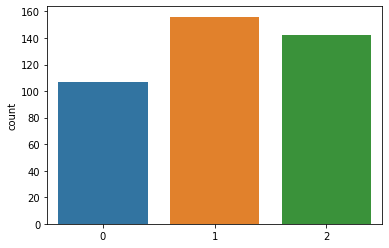

In [84]:
import seaborn as sns   # 0 - IND, 1- AFR, 2- TUS
sns.countplot(categories)
plt.show()

In [70]:
print(categories1)

['1', '1', '1', '1', '2', '0', '1', '1', '2', '1', '2', '0', '1', '1', '2', '2', '1', '1', '2', '2', '1', '0', '1', '2', '1', '2', '0', '2', '1', '2', '1', '1', '1', '1', '1', '2', '0', '0', '2', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '2', '2', '2', '2', '1', '1', '1', '2', '1', '1', '1', '1', '0', '2', '1', '1', '2', '2', '0', '1', '0', '1', '2', '1', '2', '0', '1', '0', '0', '1', '0', '2', '0', '2', '2', '2', '0', '2', '1', '1', '2', '0', '1', '0', '1', '0', '2', '1', '1', '2', '2', '2', '2', '0', '1', '2', '2', '2', '1', '2', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '2', '1', '2', '1', '0', '2', '0', '0', '2']


In [71]:
print(categories2)

['1', '1', '1', '1', '2', '0', '1', '1', '2', '1', '2', '0', '1', '1', '2', '2', '1', '1', '2', '2', '1', '0', '1', '2', '1', '2', '0', '2', '1', '2', '1', '1', '1', '1', '1', '2', '0', '0', '2', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '2', '2', '2', '2', '1', '1', '1', '2', '1', '1', '1', '1', '0', '2', '1', '1', '2', '2', '0', '1', '0', '1', '2', '1', '2', '0', '1', '0', '0', '1', '0', '2', '0', '2', '2', '2', '0', '2', '1', '1', '2', '0', '1', '0', '1', '0', '2', '1', '1', '2', '2', '2', '2', '0', '1', '2', '2', '2', '1', '2', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '2', '1', '2', '1', '0', '2', '0', '0', '2']


In [61]:
trainIAT = pd.DataFrame({'FILE':os.listdir(original_train),'label':categories})
trainIAT.to_csv("train_IAT.csv",index=False)
testIAT = pd.DataFrame({'FILE':os.listdir(original_test),'label':categories2})
testIAT.to_csv("test_IAT.csv",index=False)
validIAT = pd.DataFrame({'FILE':os.listdir(original_valid),'label':categories1})
validIAT.to_csv("valid_IAT.csv",index=False)

In [62]:
trainIAT.shape

(405, 2)

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

**IMAGEDATAGENERATOR**

In [65]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=.2, 
        height_shift_range=.2,
        fill_mode='nearest',
        rotation_range=90)
valid_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=.2, 
        height_shift_range=.2,
        fill_mode='nearest',
        rotation_range=90)
test_datagen = ImageDataGenerator(rescale=1./255)

In [66]:
train_generator = train_datagen.flow_from_dataframe(dataframe=trainIAT, 
                                             directory=original_train,
                                             x_col='FILE',
                                             y_col='label',
                                             target_size=(img_rows,img_cols),
                                             class_mode='categorical',
                                             batch_size=10,
                                             shuffle=True,
                                             color_mode='rgb',
                                             seed=7)
 
validation_generator = valid_datagen.flow_from_dataframe(dataframe=validIAT, directory=original_valid,
                                             x_col='FILE',
                                             y_col='label',
                                             target_size=(img_rows,img_cols),
                                             class_mode='categorical',
                                             batch_size=10,
                                             shuffle=True,
                                             color_mode='rgb',
                                             seed=7)
test_generator = test_datagen.flow_from_dataframe(dataframe=testIAT, directory=original_test,
                                             x_col='FILE',
                                             y_col='label',
                                             target_size=(img_rows,img_cols),
                                             class_mode='categorical',
                                             batch_size=10,
                                             shuffle=True,
                                             color_mode='rgb',
                                             seed=7)

Found 405 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.
Found 128 validated image filenames belonging to 3 classes.


In [79]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

In [80]:
# BUILDING THE MODEL

model = Sequential()
model.add(Conv2D(512, (img_rows,img_cols), padding="valid", activation="relu", input_shape=(img_rows, img_cols, 3)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# COMPILING THE MODEL

model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.01, min_lr=0.00001)

history1=model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=10,callbacks=reduce_lr)

Epoch 1/10
41/41 [==============================] - 13s 307ms/step - loss: 3.3477 - accuracy: 0.3901 - val_loss: 1.0829 - val_accuracy: 0.4141
Epoch 2/10
41/41 [==============================] - 12s 299ms/step - loss: 1.1086 - accuracy: 0.3852 - val_loss: 1.0957 - val_accuracy: 0.3281
Epoch 3/10
41/41 [==============================] - 12s 299ms/step - loss: 1.0966 - accuracy: 0.3556 - val_loss: 1.0925 - val_accuracy: 0.3672
Epoch 4/10
41/41 [==============================] - 12s 298ms/step - loss: 1.1066 - accuracy: 0.3827 - val_loss: 1.0863 - val_accuracy: 0.4141
Epoch 5/10
41/41 [==============================] - 12s 299ms/step - loss: 1.0932 - accuracy: 0.3852 - val_loss: 1.0816 - val_accuracy: 0.4141
Epoch 6/10
41/41 [==============================] - 12s 297ms/step - loss: 1.0886 - accuracy: 0.3852 - val_loss: 1.0762 - val_accuracy: 0.4141
Epoch 7/10
41/41 [==============================] - 12s 295ms/step - loss: 1.0871 - accuracy: 0.3852 - val_loss: 1.0834 - val_accuracy: 0.4141

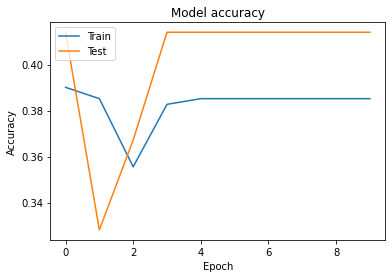

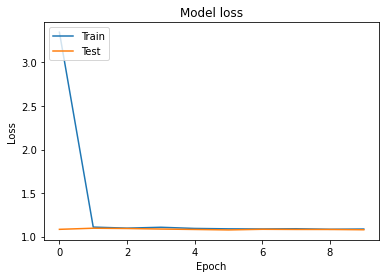

In [81]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [82]:
model.evaluate(validation_generator)

13/13 [==============================] - 2s 186ms/step - loss: 1.0825 - accuracy: 0.4141


[1.082505464553833, 0.4140625]